In [1]:
import pandas as pd
import numpy as np
import os
from glob import glob
import re
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

%matplotlib inline
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [2]:
races = dict()

for path in glob('../../data/processed/*'):
    filename = os.path.basename(path)
    races[filename[0].upper()] = pd.read_csv(path, index_col=0)

In [12]:
protoss_df = races['P'].copy(deep=True)

In [25]:
times = dict()
for i in protoss_df.match_id.unique():
    protoss_df[protoss_df.match_id == 6]

,match_id,map_name,region,game_length,race,enemy_race,ap30s,frame,second,player,workers_active_count,food_used,food_made,minerals_current,minerals_collection_rate,minerals_used_in_progress,minerals_used_current,minerals_used_active_forces,minerals_lost,vespene_current,vespene_collection_rate,vespene_used_in_progress,vespene_used_current,vespene_used_active_forces,vespene_lost,adept,archon,assimilator,carrier,colossus,cyberneticscore,darkshrine,darktemplar,disruptor,fleetbeacon,forge,gateway,hightemplar,immortal,interceptor,mothership,mothershipcore,nexus,observer,oracle,phoenix,photoncannon,probe,pylon,reactor,roboticsbay,roboticsfacility,sentry,shieldbattery,stalker,stargate,tempest,templararchive,twilightcouncil,voidray,warpgate,warpprism,zealot,win
126,6,Triton LE,eu,524,P,P,0.0,1,0,Player 1 - Harstem (Protoss),12,12.0,15.0,50,0,0,1000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
127,6,Triton LE,eu,524,P,P,238.0,480,30,Player 1 - Harstem (Protoss),13,14.0,15.0,45,699,150,1050,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,13,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
128,6,Triton LE,eu,524,P,P,408.8,960,60,Player 1 - Harstem (Protoss),15,16.0,23.0,40,867,200,1250,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,15,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,False
129,6,Triton LE,eu,524,P,P,322.0,1440,90,Player 1 - Harstem (Protoss),18,19.0,23.0,105,951,350,1400,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,18,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,False
130,6,Triton LE,eu,524,P,P,243.6,1920,120,Player 1 - Harstem (Protoss),20,21.0,23.0,190,923,350,1650,0,0,28,156,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,20,1,0,0,0,0,0,0,0,0,0,0,0,2,0,0,False
131,6,Triton LE,eu,524,P,P,347.2,2400,150,Player 1 - Harstem (Protoss),22,23.0,23.0,145,867,450,1900,0,0,116,291,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,22,2,0,0,0,0,0,0,0,0,0,0,0,2,0,0,False
132,6,Triton LE,eu,524,P,P,260.4,2880,180,Player 1 - Harstem (Protoss),24,27.0,31.0,95,979,175,2400,0,0,132,335,50,0,0,0,0,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,24,2,0,0,0,0,0,0,0,0,0,0,0,2,0,0,False
133,6,Triton LE,eu,524,P,P,260.4,3360,210,Player 1 - Harstem (Protoss),25,30.0,39.0,245,1035,325,2550,0,0,148,313,150,0,0,0,0,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,25,4,0,0,0,0,0,0,0,0,0,0,0,2,0,0,False
134,6,Triton LE,eu,524,P,P,254.8,3840,240,Player 1 - Harstem (Protoss),26,33.0,39.0,10,951,650,2775,175,0,60,313,200,150,150,0,0,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,26,3,0,0,1,1,0,1,0,0,0,0,0,2,0,0,False
135,6,Triton LE,eu,524,P,P,285.6,4320,270,Player 1 - Harstem (Protoss),27,36.0,39.0,95,1007,825,2875,225,0,130,335,150,250,250,0,0,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,0,0,1,0,27,4,0,0,1,2,0,1,0,0,0,0,0,2,0,0,False


In [4]:
grouped_df = protoss_df.loc[:, ['match_id', 'map_name', 'region', 'enemy_race', 'win']]
grouped_df = grouped_df.groupby(grouped_df['match_id']).head(1)

In [5]:
grouped_df.head()

,match_id,map_name,region,enemy_race,win
0,1,World of Sleepers LE,us,T,False
21,2,Thunderbird LE,us,P,True
59,3,Triton LE,us,T,False
86,5,Disco Bloodbath LE,us,Z,True
126,6,Triton LE,eu,P,False


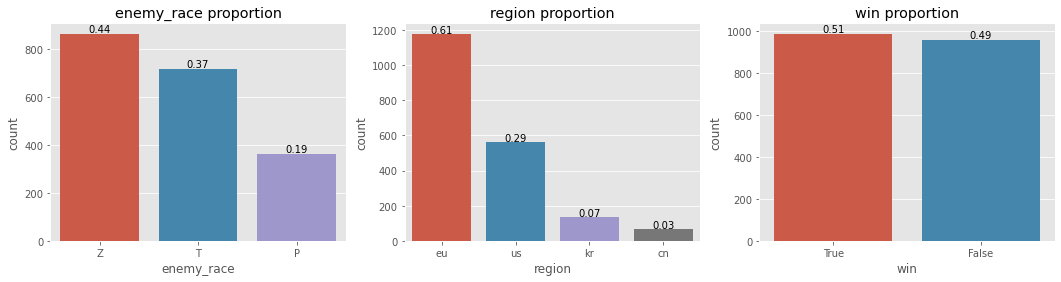

In [6]:
shape = (1,3)
fig = plt.figure(figsize=(18,4))

for i, feature in enumerate(['enemy_race', 'region', 'win']):
    ax = fig.add_subplot(*shape,i+1)
    ax.title.set_text('{} proportion'.format(feature))
    sns.countplot(data=grouped_df, x=feature, order=grouped_df[feature].value_counts().index, ax=ax)

    for p in ax.patches:
        height, width = p.get_height(), p.get_width()
        x, y = p.get_x()+width/2, height+6
        text = '{:1.2f}'.format(height/len(grouped_df))
        
        ax.text(x, y, text, ha='center')

plt.show()

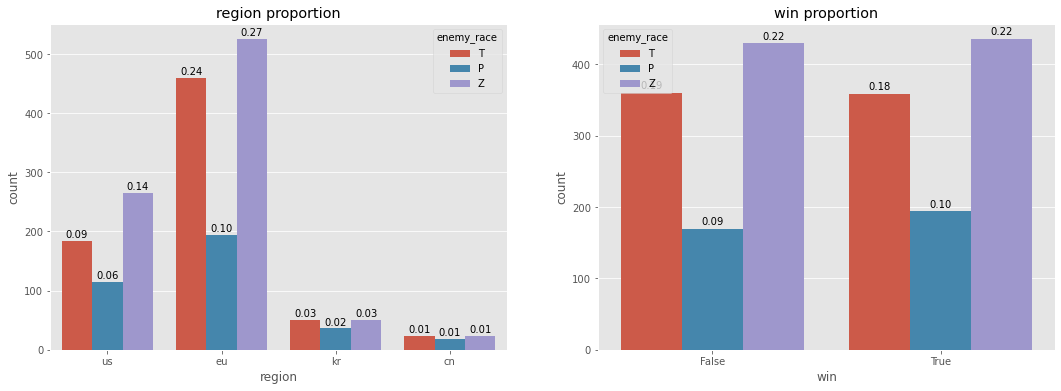

In [7]:
shape = (1,2)
fig = plt.figure(figsize=(18,6))

for i, feature in enumerate(['region', 'win']):
    ax = fig.add_subplot(*shape,i+1)
    ax.title.set_text('{} proportion'.format(feature))
    sns.countplot(data=grouped_df, x=feature, hue='enemy_race', ax=ax)

    for p in ax.patches:
        height, width = p.get_height(), p.get_width()
        x, y = p.get_x()+width/2, height+6
        text = '{:1.2f}'.format(height/len(grouped_df))
        
        ax.text(x, y, text, ha='center')

plt.show()

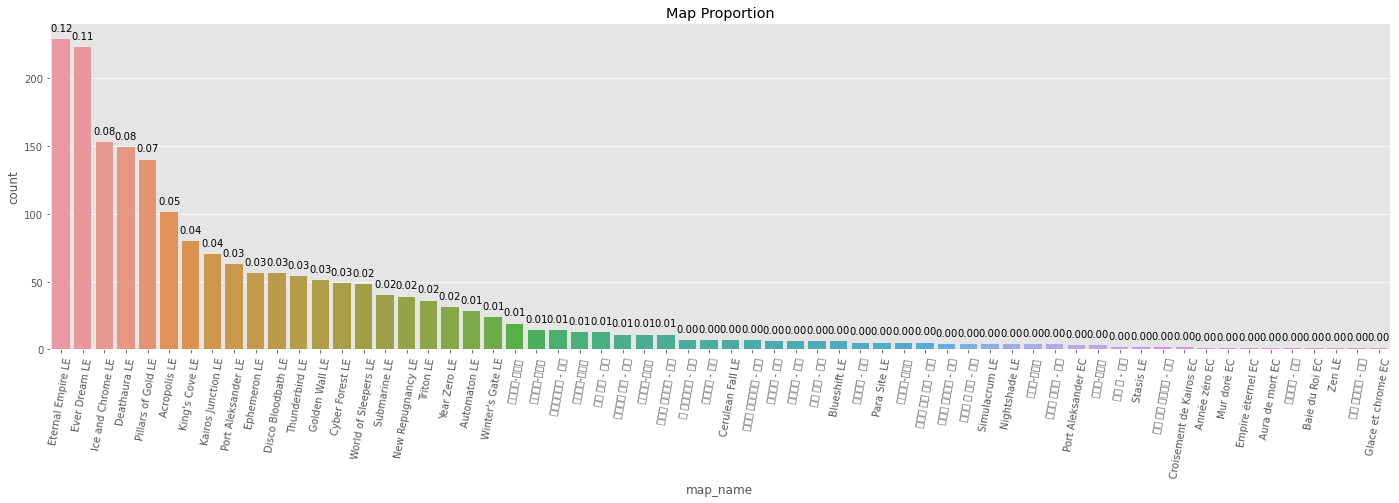

In [8]:
plt.figure(figsize=(24, 6))
ax = sns.countplot(data=grouped_df, x='map_name', order=grouped_df.map_name.value_counts().index)
plt.xticks(rotation=80)
plt.title('Map Proportion')

for p in ax.patches:
        height, width = p.get_height(), p.get_width()
        x, y = p.get_x()+width/2, height+6
        text = '{:1.2f}'.format(height/len(grouped_df))
        
        ax.text(x, y, text, ha='center')

plt.show()

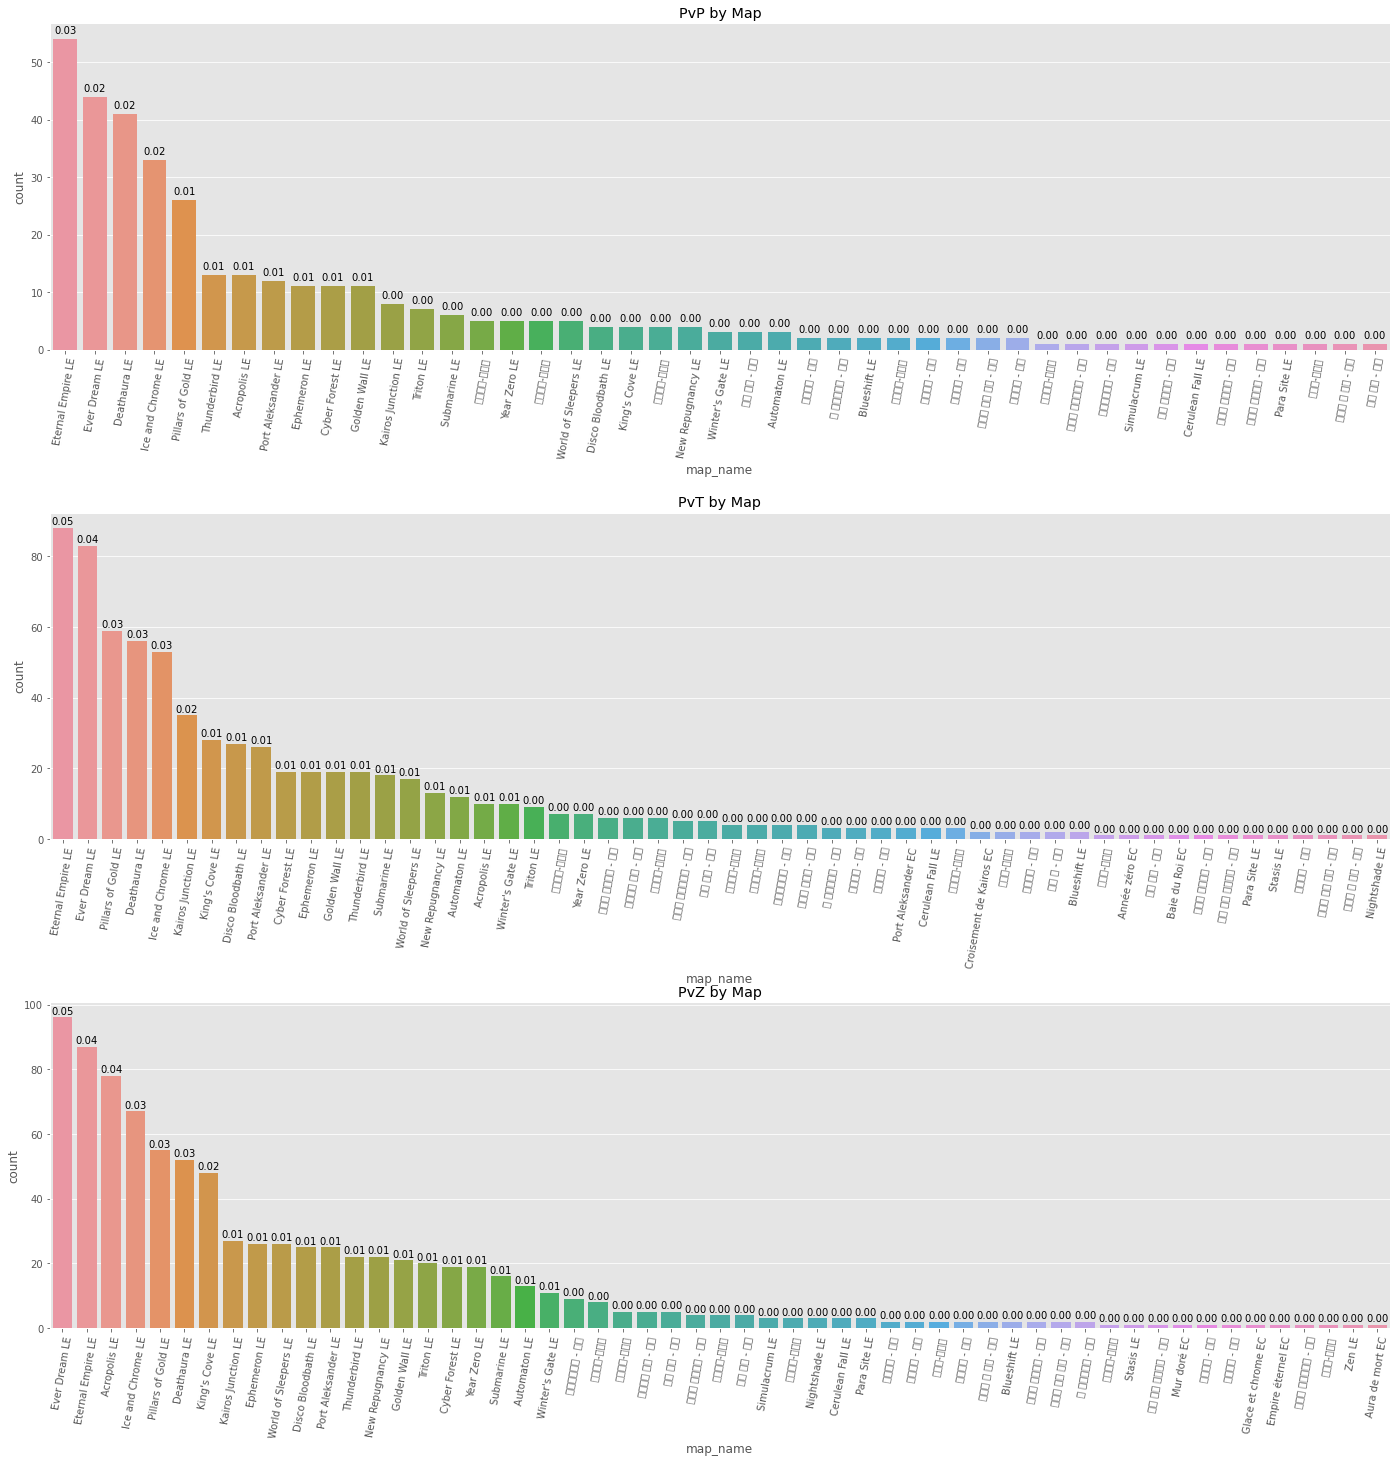

In [9]:
shape = (3,1)
fig = plt.figure(figsize=(24, 24))

for i, enemy_race in enumerate(['P','T','Z']):
    ax = fig.add_subplot(*shape,i+1)
    ax.title.set_text('Pv{} by Map'.format(enemy_race))
    tdf = grouped_df[grouped_df.enemy_race == enemy_race]
    ax = sns.countplot(data=tdf, x='map_name', order=tdf.map_name.value_counts().index, ax=ax)
    plt.xticks(rotation=80)

    for p in ax.patches:
            height, width = p.get_height(), p.get_width()
            x, y = p.get_x()+width/2, height+1
            text = '{:1.2f}'.format(height/len(grouped_df))
            
            ax.text(x, y, text, ha='center')

plt.subplots_adjust(hspace=.5)
plt.show()

In [10]:
show_map_count = grouped_df.map_name.value_counts().sort_values(ascending=False)
show_data = dict(occurences=show_map_count.values)
for race in ['P','T','Z']:
    show_data[race] = grouped_df[grouped_df.enemy_race == race].map_name.value_counts()

show_df = pd.DataFrame(show_data, index=show_map_count.index, dtype='int32')

In [11]:
show_df.head()

,occurences,P,T,Z
Eternal Empire LE,229,54.0,88.0,87.0
Ever Dream LE,223,44.0,83.0,96.0
Ice and Chrome LE,153,33.0,53.0,67.0
Deathaura LE,149,41.0,56.0,52.0
Pillars of Gold LE,140,26.0,59.0,55.0
